# **Machine Learning** _Day 74_
##### Name: Muhammad Hassaan
##### Date: July 22, 2024
##### Email: muhammadhassaan7896@gmail.com

In [6]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [7]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# impute missing values 
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

<Axes: xlabel='age', ylabel='Count'>

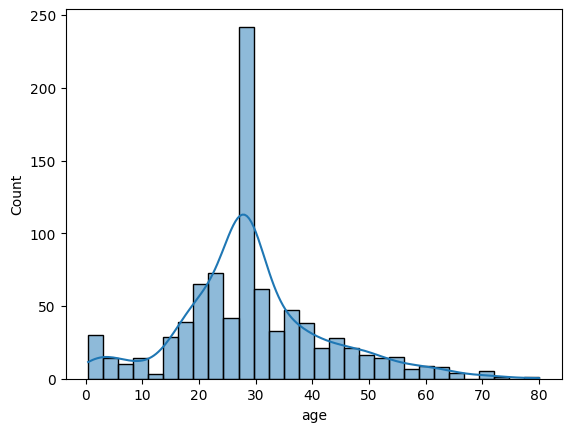

In [9]:
sns.histplot(df['age'], kde=True)

In [18]:
# age discretization 
age_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['age_bin'] = age_discretizer.fit_transform(df[['age']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0


<Axes: xlabel='age', ylabel='Count'>

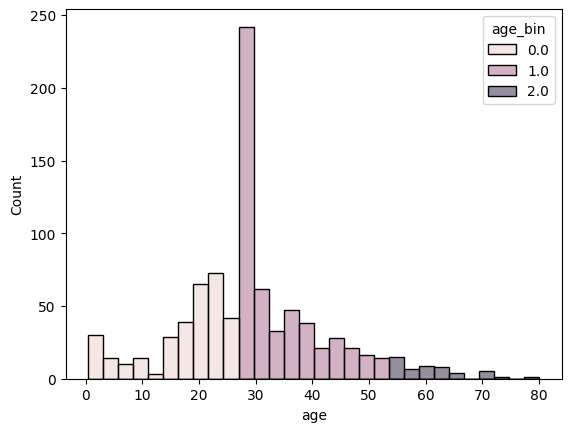

In [19]:
sns.histplot(df, x = 'age', hue='age_bin')

<Axes: xlabel='age', ylabel='Count'>

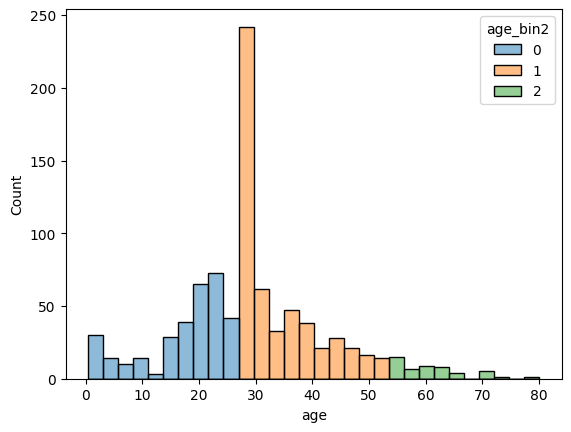

In [20]:
# pandas methid for manual binning 
df['age_bin2'] = pd.cut(df['age'], bins=3, labels=[0,1,2])
sns.histplot(df, x='age', hue='age_bin2')